In [2]:
# Libraries

# For processing data
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [21]:
# Obteniendo los datos
# ==============================================================================
train = pd.read_excel('bike_train.xlsx')
test = pd.read_excel('bike_test.xlsx')

print(f'Train {train.shape}')
print(f'Test {test.shape}')

Train (11999, 17)
Test (5380, 16)


In [22]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
# Chequeando Nulos
# ==============================================================================
print(f'Train tiene {train.isna().sum().sum()} nulos')
print(f'Test tiene {test.isna().sum().sum()} nulos')

Train tiene 0 nulos
Test tiene 0 nulos


In [48]:
# Preparando el train y el test para la regresion
# ==============================================================================
train_reg = train[['dteday','cnt']].groupby(by = 'dteday',as_index=False).sum()
train_reg['dteday_ord'] = train_reg['dteday'].apply(lambda x: x.toordinal()) # Convierto a ord

test_reg = test[['dteday']].groupby(by = 'dteday',as_index=False).count()
test_reg['dteday_ord'] = test_reg['dteday'].apply(lambda x: x.toordinal())

In [52]:
# Feature y response
# ==============================================================================
X = train_reg['dteday_ord']
y = train_reg['cnt']

In [53]:
# Correlacion Lineal entre las variables
# ==============================================================================
corr_test = pearsonr(x = X, y =  y)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.537603267761121
P-value:  3.0650779244717686e-39


In [54]:
# Fitting el modelo
# ===============================================================================
X_scaled = X.values.reshape(-1,1)
y_scaled = y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=123)

lr = LinearRegression()

modelo = lr.fit(X_train, y_train)

In [56]:
# Información del modelo
# ==============================================================================
print("Intercept:", lr.intercept_)
print("Coeficiente:", lr.coef_)
print("Coeficiente de determinación R^2:", lr.score(X_scaled, y_scaled))
print('--------------------')
print('El modelo lineal obtiene la ecuacion:')
print(f'cantidad de bicis = {lr.intercept_} + {lr.coef_} * fecha')
print('--------------------')
print(f'El r**2 indica que el modelo es capaz de explicar {round(lr.score(X_scaled, y_scaled),3)*100}% de la variabilidad observada en la variable respuesta.')

Intercept: [-4050559.81832747]
Coeficiente: [[5.52064221]]
Coeficiente de determinación R^2: 0.28826355280863425
--------------------
El modelo lineal obtiene la ecuacion:
cantidad de bicis = [-4050559.81832747] + [[5.52064221]] * fecha
--------------------
El r**2 indica que el modelo es capaz de explicar 28.799999999999997% de la variabilidad observada en la variable respuesta.


In [57]:
# Predicting
# ==============================================================================
y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)

# MSE evaluation
# ==============================================================================
rmse_train = mean_squared_error(y_true  = y_train, y_pred  = y_train_predict, squared=False)
rmse_test = mean_squared_error(y_true  = y_test, y_pred  = y_test_predict, squared=False)
print(f"The predictions in the TRAIN set of the final model are on average {rmse_train} units away from the real value.")
print(f"The predictions in the TEST set of the final model are on average {rmse_test} units away from the real value.")

The predictions in the TRAIN set of the final model are on average 1340.716494517765 units away from the real value.
The predictions in the TEST set of the final model are on average 1286.7145591107499 units away from the real value.


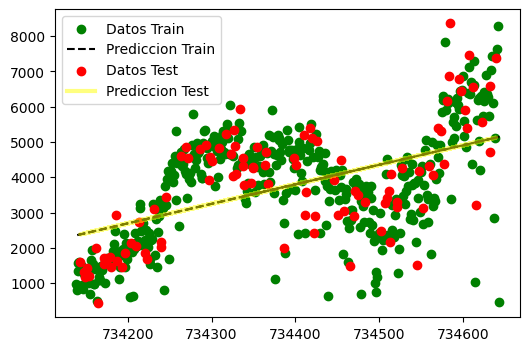

In [60]:
# Visualising the results

plt.figure(figsize = (6,4))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_predict, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_predict, color='yellow', linewidth=3.0, label = 'Prediccion Test',alpha=0.5)

plt.legend()
plt.show()

In [68]:
# Prediciendo el test original
test['dteday_ord'] = test['dteday'].apply(lambda x: x.toordinal())
predicc = lr.predict(test['dteday_ord'].values.reshape(-1,1))

In [70]:
# MSE evaluation
# ==============================================================================
rmse = mean_squared_error(y_true  = test['dteday_ord'].values.reshape(-1,1), y_pred  = predicc, squared=False)

print(f"The predictions in the TRAIN set of the final model are on average {rmse} units away from the real value.")

The predictions in the TRAIN set of the final model are on average 728994.5768709661 units away from the real value.


In [76]:
# Exportacion modelo
miguelarnone = pd.DataFrame(predicc)
miguelarnone.columns = ['pred']
miguelarnone.to_csv('miguelarnone.csv')